# Linear Models in Machine Learning on Python - Logistic Regression 1 

Welcome to the first notebook about Logistic Regression. In this notebook we will go through the most basic classification algorithm in Machine Learning.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

The function you see below is called the logistic function. The logistic function belongs to a function family called sigmoid functions, which are named as because of their characteristic of having the S-shaped form. There are lots of sigmoid functions but since we are dealing with logistic regression, I only represent logistic function here, yet you can find out more about these functions by clicking the link. [Wikipedia](https://en.wikipedia.org/wiki/Sigmoid_function).

The idea behind logistic regression is quite simple if you are familiar with linear regression algorithm. By using a linear combination (just like the one we used in linear regression) we are computing a value. The main difference here is we have a different hypothesis function, instead of directly outputting the value in the case of linear regression, we use the calculated linear combination in logistic function. The logistic function then, gives us a probability value between 0 and 1 if this value is above the threshold (which is generally 0.5) we assign our instance to a positive class if not we assign it to a negative class. 

I recommend watching Statquest's videos for logistic regression for those who are not familiar with the algorithm [link](https://www.youtube.com/watch?v=yIYKR4sgzI8&t=368s)
 

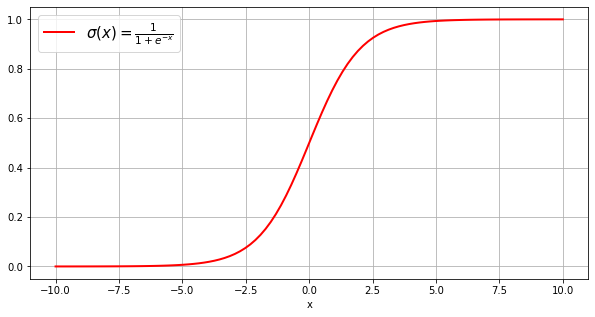

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10, 10, 100,1000)
sig = 1 / (1 + np.exp(-x))
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(x, sig, "r-", linewidth=2, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
plt.xlabel("x")
plt.legend(fontsize=15)
plt.show()

## Underhood the Hood Mathematics for Logistic Regression

Let's define some basic functions that we already talked about above.

1. We have our hypothesis function $h_{\theta }\left(x\right)=g\left(\theta^T\cdot x\right)$ where $g\left(z\right)=\frac{1}{1+e^{-z}}$
2. We want our hypothesis to be between 0 and 1. Let's also express that mathematically $0\le h_{\theta }\le 1$
3. When we combine $h_{\theta }\left(x\right)$ and $g\left(z\right)$ we get $h_{\theta }\left(x\right)=\frac{1}{1+e^{-\theta ^T\cdot x}}$
4. Let's say 0.5 is our threshold. We predict 1 if the output of the function if more than or equal to 0.5. Otherwise, we will predict 0. In mathematical terms $h_{\theta }\left(x\right)=g\left(\theta \:^Tx\right)\ge \:0.5$ whenever $\theta ^Tx\ge 0$ and $h_{\theta}\left(x\right)=g\left(\theta^Tx\right)<0.5$ whenever $\theta^Tx\:<0$.

Notice that if $x<0$ then $\sigma \left(x\right)\le 0.5$ and if $x>0$ then $\sigma \left(x\right)\ge \:0.5$ which means if our linear combination is below zero then we predict our instance belongs to negative class and we predict our instance belongs to positive class if the linear combination is above zero.

As we talked above the hypothesis function is actually the probability of something. For example, If we would like to predict the probability of having a stroke. $h\left(x\right)=0.7$ means %70 percent of chance that the person will have a stroke. So it is literally the probability that y=1, given x, parameterized by  $P\left(y=1\:|\:x;0\right)+P\left(y=0\:|\:x;0\right)=1$. Also by adding extra features to the equation of hypothesis we can have different desicion boundaries so that we can classify different types of data.

We also need a cost function for logistic regression, unfortunately we cannot use the one we used for linear regression. Our aim here is to tune $\theta$ so that we get a higher probability for positive instances and get lower probability for negative instances. We can do that by using the function below.

$$Cost\left(h_{\theta }\left(x^{\left(i\right)},y^{\left(i\right)}\right)\right)=\left\{-log\left(h_{\theta }\left(x\right)\right)\:if\:y=1\:,\:-log\left(1-h_{\theta}\left(x\right)\:if\:\:y=0\right)\right\}$$

It is not so easy to grasp the idea behind that function but we can illustrate it by using some values. 

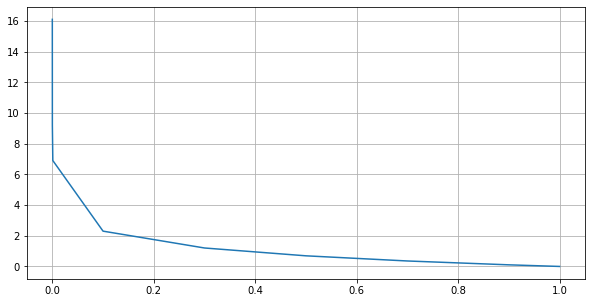

In [3]:
x = [1,0.9,0.7,0.5,0.3,0.1,0.001,0.0001,0.0000001]
minuslog=-np.log(x)
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(x, minuslog)


The plot above shows us that the function $-log(x)$ gets bigger if $x$ gets closer to zero. This means that we will get a high cost when the model wrongly assigns an instance to the negative class whereas it is actually in the positive class (in other words, the cost is large when the model estimates a probability value close to zero for a positive instance) also with the second part of the cost function the cost will be high again if the model assigns the instance to positive class when it should be in the negative class. Moreover, we get a low value when x is close to 1, in other words, we don't penalize much when we correctly classify. The cost function for all the instances in our data can be written in a single equation format as stated below (This function is actually the same as the one above, we just represented it in a single format and take its average for all instances).

$$J\left(\theta\right)=-\frac{1}{m}\left[\sum _{i=1}^m y^{\left(i\right)}log\left(h_{\theta }\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)log\left(1-h_{\theta }\left(x^{\left(i\right)}\right)\right)\right]$$

Now It's time for optimization. To use gradient descent for optimizing the algorithm we need to take derivative of cost function which is $$\frac{\partial }{\partial \theta }\left(J\left(\theta \right)\right)=\frac{1}{m}\:\sum _{i=1}^m\left(h_{\theta }\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^2\cdot x_j^{\left(i\right)}$$

Although it looks identical to gradient descent equation of linear regression, do not forget that we have a different hypothesis function for logistic regression. And finally, our update rule can be written as $$\theta _j:=\theta _j-\:\alpha\left(\frac{1}{m}\:\sum _{i=1}^m\left(h_{\theta }\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^2\cdot x_j^{\left(i\right)}\right)\:$$

For derivation of cost function please see the [link](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d)

# Breast Cancer Dataset

Okay now let's start using logistic regression. There are lots datasets that we can use for binary classification but as a biologist, I like using Breast Cancer Dataset for logistic regression. We can directly load this dataset using sklearn.

In [4]:
from sklearn.datasets import load_breast_cancer
data_bc = load_breast_cancer()

Let's look at the description of the dataset.

In [5]:
print(data_bc.DESCR) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

We can also see all the keys we have in this dataset.

In [6]:
list(data_bc.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

We can directly look at our predictors and target. I like this "tidy" way of datasets in sklearn.

In [7]:
data_bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Let's use `countplot()` function to see we really have a binary problem, more importantly, it is good to check whether or not there is class imbalance. I will show ways to deal with class imbalance in the following notebooks.

C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

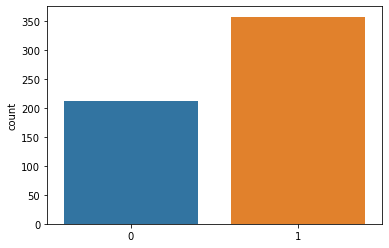

In [8]:
sns.countplot(data_bc["target"])

Okay let's get started with converting our predictors to a pandas DataFrame.

In [9]:
predictors = pd.DataFrame(data=data_bc.data, columns=data_bc.feature_names)
predictors.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Secondly, looking at correlations can be good.

In [10]:
corr_matrix=pd.concat([predictors, pd.DataFrame(data_bc["target"],columns={"target"})], axis=1).corr()
corr_matrix["target"].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

## Decision Boundary

In the first example, I also would like to show decision boundary (decision boundary is linear line between the negative and the positive class). I need two of the predictors above to do that (I can use more predictors but it would not give us a clear boundary). I will use Mean Perimeter and Mean Texture altough they are not the most correlated two features, they will give me a clear decision boundary. 

In [11]:
X= np.transpose(predictors[["mean perimeter","mean texture"]])
y= data_bc["target"]
X.T

,mean perimeter,mean texture
0,122.80,10.38
1,132.90,17.77
2,130.00,21.25
3,77.58,20.38
4,135.10,14.34
...,...,...
564,142.00,22.39
565,131.20,28.25
566,108.30,28.08
567,140.10,29.33


Let's apply Logistic Regression by using the function `LogisticRegression()`. Here I will pass `solver=lbfgs` for optimization which is actually the default solver for this function. Moreover, I will not use any regularization here. For learning more about parameters of Logistic Regression function : [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [12]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42, penalty='none')
log_reg.fit(X.T,y)

LogisticRegression(penalty='none', random_state=42)

Let's now use our `predict()` function to get our predicted classes.

In [13]:
predicted_class=log_reg.predict(X.T)

In [14]:
accuracy_score(predicted_class,y)

0.8963093145869947

The accuracy score is %89 which is quite good value if we consider we are just using two predictors but don't get tricked by this high accuracy. We are using the data we trained our model while predicting, that's why, this performance may be deceptive.


Now It's time to plot the decision boundary. To do that, I need values of weight and bias terms.

In [15]:
w_0=log_reg.coef_[:,0]
w_1=log_reg.coef_[:,1]
bias = log_reg.intercept_

I will plot the decision boundary but our labels will be the one in the dataset, in other words, our target labels. We can see that the model has some mistakes.

(0.0, 45.0)

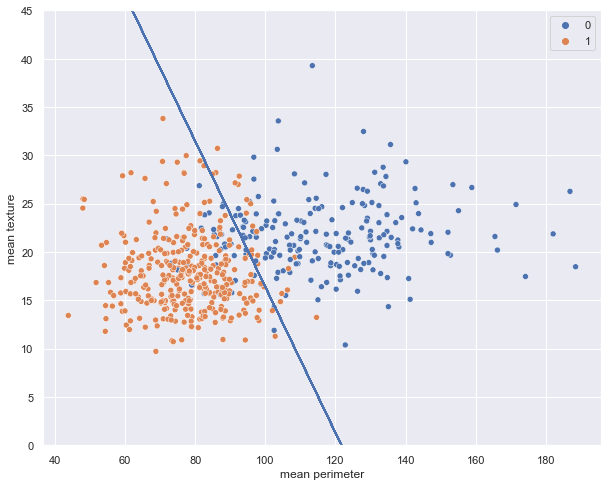

In [16]:
sns.set_theme()
f, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=X.loc["mean perimeter"],y=X.loc["mean texture"],hue=y)
decision_boundary=-(bias+(w_0)*X.loc["mean perimeter"])/(w_1)
plt.plot(X.loc["mean perimeter"],decision_boundary)
plt.ylim(0, 45)

Now I will use our predicted classes, this time you can see that above the decision boundary every class has assigned to 0.

(0.0, 45.0)

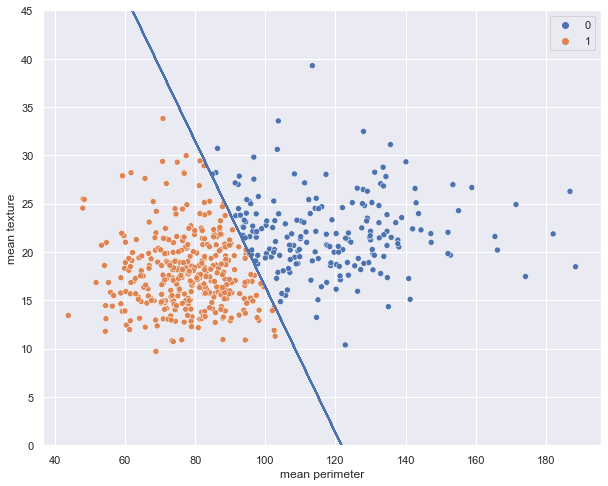

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=X.loc["mean perimeter"],y=X.loc["mean texture"],hue=predicted_class)
decision_boundary=-(bias+(w_0)*X.loc["mean perimeter"])/(w_1)
plt.plot(X.loc["mean perimeter"],decision_boundary)
plt.ylim(0, 45)

Dealing with decision boundaries is cumbersome if we have more than two predictors. I will share two links that I used while creating these decision boundaries. Moreover, It is actually better, I think, to use `contourplot()` for plotting the decision boundary but I hadn't done this example with a straight line decision boundary before I added this one here, that's why I wanted to do a straight line decision boundary as an example. [link1](https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/) [link2](https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression)


For decision boundary with contourplot check out this [link](https://favtutor.com/blogs/decision-boundary-logistic-regression)


Lastly, there is also a library that we can use for plotting decision boundary. I actually didn't use it before but saw some examples of it. Perhaps some people would like to try it out, that's why, I share a documentation for it as well. [plot__decision_regions](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)

## Exploring Cross Validation for Logistic Regression

In my notebooks for Logistic Regression we will revisit cross validation again and again. That is because of there are some important concepts and I just don't want to talk about them in one notebook, instead, I would like to use these concepts one by one with different datasets in different notebooks. Here we will focus 3 important function that we need to learn. Let's get started.

Let's fit our logistic regression model again but this time with all the predictors.

In [18]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42, max_iter=300)
log_reg.fit(predictors,y)

LogisticRegression(max_iter=300, random_state=42)

In [19]:
accuracy_score(log_reg.predict(predictors),y)

0.9595782073813708

Okay now It's time for cross-validation. I will not go into details of cross-validation here since I already talked about it in my regression notebooks but to emphasize the idea let's have a quick summarization of it, the idea is simply dividing our dataset into k-folds then we will use k-1 folds for training and then use this model for validation on the reserved fold. After each evaluation, we will get an accuracy score and then the algorithm goes on performing the same step for n-folds (here I will use 3 folds). 

Here one point that should be considered is why the process isn't called cross-testing. It's actually because here we also need a test set as well, even though, I will not use it for that kind of basic problem. But the idea of validation is actually about finding the best hyperparameters and while doing that we don't want knowledge to leak to our model, that's why we use validation or validation set. You can find more about that in the [link](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)


Here I will use three different function.
1. `cross_val_score()`: It does exactly what I described above and returns the accuracy scores for each fold.
2. `cross_val_predict()`: Just like cross_val_score() we can use this function for cross validation but this time the function returns the labels not the accuracy scores. 
3. `cross_validate()`: This function is also very similar cross_val_scores() and returns a similar result but we have more parameters and make use of this function in a better way than cross_val_score().

There are some important differences between these functions and I will point them out while I'm showing how to use them.

In [20]:
val_scores=cross_val_score(log_reg, predictors, y, cv=3, scoring="accuracy")
val_scores

array([0.93684211, 0.96842105, 0.94179894])

The above code is actually the same creating a `KFold()` with 3 and passing it to cv parameter. We can directly pass 3 to cv  and you can also use other K-Fold strategies with this function, I will talk about some of them as well but I also recommend reading the documentation in advance [link](https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)
This function is I think very straightforward and does the classical cross validation process, that's why, I wanted to start with it. 


Let's now use `cross_val_predict()`

In [21]:
y_train_pred = cross_val_predict(log_reg, predictors, y, cv=3)
accuracy_score(y_train_pred,y)

0.9490333919156415

Well the accuracy score is different than the ones above. Perhaps it is the average of all the values above. let's find the mean of val_scores.

In [22]:
val_scores.mean()

0.949020699897893

The average value is so much close to the one we got using `cross_val_predict()` but still not the same. So what does this function do ?  The function returns, for each element in the input, the prediction that was obtained for that element when it was in the test set. In that case sklearn also warns us not to use this function for calculating metrics.


* *The result of cross_val_predict may be different from those obtained using cross_val_score as the elements are grouped in different ways. The function cross_val_score takes an average over cross-validation folds, whereas cross_val_predict simply returns the labels (or probabilities) from several distinct models undistinguished. Thus, cross_val_predict is not an appropriate measure of generalisation error.*

The function `cross_val_predict()` is appropriate for:
1. Visualization of predictions obtained from different models.
2. Model blending: When predictions of one supervised estimator are used to train another estimator in ensemble methods.

When I first learnt about these function, they confused me a lot. Things were easier when I was doing cross validation on MATLAB. To differentiate them, I firstly recommend you to read the sklearn page that I shared above in which you can find how these function works and when to use which. Then also read the documentation for `cross_val_predict()` : [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html). Afterwards, I recommend reading some discussions about these the two functions in which you can read more about differences between them.
1. Read these ones first, there is a good explanation for cross_val_predict 

[How is scikit-learn cross_val_predict accuracy score calculated?](https://stackoverflow.com/questions/41458834/how-is-scikit-learn-cross-val-predict-accuracy-score-calculated/41524968#41524968)

[Difference between cross_val_score and cross_val_predict](https://stackoverflow.com/questions/43613443/difference-between-cross-val-score-and-cross-val-predict)


2. For more information about why you shouldn't use cross_val_predict in metrics 

[Why is cross_val_predict not appropriate for measuring the generalisation error?](https://stackoverflow.com/questions/55009704/why-is-cross-val-predict-not-appropriate-for-measuring-the-generalisation-error) 

[Why should we use cross_val_predict instead of just normally predicting our instances using all the training set?](https://stats.stackexchange.com/questions/502037/why-should-we-use-cross-val-predict-instead-of-just-normally-predicting-our-inst)

I don't see many differences between them but these differences can be important in a real-life example in which we deal with lots of pre-processing and trying to get a good model. However, again I want to emphasize the idea with cross-validation is to find the best hyperparameters so we need a test set too.

Then what will we do ? In this cross_val_score() vs cross_val_predict() case I think `cross_validate()` come to our rescue. Firstly have a look at the documentation for this function [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

For this function I need to pass the estimator (log_reg), scoring (strategy to evaluate the performance of the cross-validated model on the test set). Moreover, I will set **return_estimator=True** so that the function can return the logistic regression models fitted on each fold.

In [23]:
cv_results = cross_validate(log_reg, predictors, y, cv=3, scoring="accuracy",return_estimator=True)
cv_results

{'fit_time': array([0.09454823, 0.07992721, 0.06646872]),
 'score_time': array([0.00199986, 0.0009985 , 0.00100088]),
 'estimator': [LogisticRegression(max_iter=300, random_state=42),
  LogisticRegression(max_iter=300, random_state=42),
  LogisticRegression(max_iter=300, random_state=42)],
 'test_score': array([0.93684211, 0.96842105, 0.94179894])}

In [24]:
cv_results["test_score"]

array([0.93684211, 0.96842105, 0.94179894])

Here be careful about the accuracy scores. The function uses k-1 folds for training and then test the model on reserved fold, so the accuracy values we got here are test scores on each fold. Let's see performance of this model on the all training set (actually we should use a test set to determine which cross validated model is best here but the dataset is really small that's why I am using the training set)

In [25]:
i=0;
while i < len(cv_results["estimator"]):
    print(accuracy_score(cv_results["estimator"][i].predict(predictors),y))
    i += 1
    


0.9560632688927944
0.9560632688927944
0.9595782073813708


The third model performs better on the training data. We will deal with this cross validation steps more when we start using hyperparameters tuning for Logistic Regression. Lastly,  I also want to share another medium article that I like, this article is about data stratification [continuous_data_stratification](https://danilzherebtsov.medium.com/continuous-data-stratification-c121fc91964b)

##  Classification Metrics

It's time to learn classification metrics, let's firstly understand why we need different metrics than accuracy. I previously talked about how accuracy can be deceptive, to understand why let's imagine a quick example. let's say we have a dataset in which we have information about a brain tumor, the %95 percent of the instances have a brain tumor so there is a big class imbalance. When we use logistic regression on that dataset and get %95 percent accuracy, this probably means that we model cannot decide whether a person has a brain tumor, the model just memorized those instances and just assigns them into the positive class. Therefore, we need some realistic metrics that can give us more idea of how well our model performs.

Even though it's not recommended, I will use the predicted labels from `cross_val_predict()`, this won't be a problem for that example I suppose. I will start with `confusion_matrix()`, instead of explaining the confusion matrix here I will more focus on the metrics that we can create by using this confusion matrix but you can find Statquest's confusion matrix video here [link](https://www.youtube.com/watch?v=Kdsp6soqA7o) also you can read this medium article as well [link](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

In [26]:
conmat=confusion_matrix(y, y_train_pred)

<AxesSubplot:>

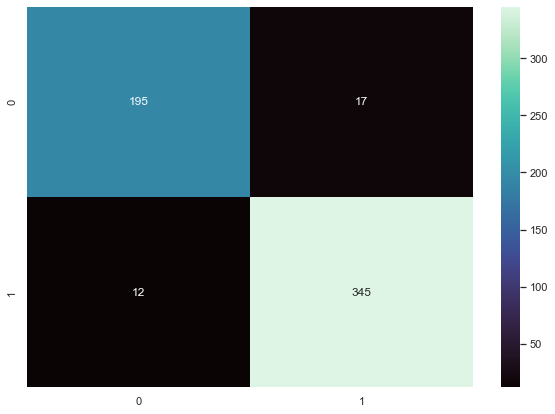

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(conmat, annot=True,fmt='g',cmap="mako")# fmt='g' is for getting rid of scientific notation and cmap = colormap

Let's also show the rates as percentages.

<AxesSubplot:>

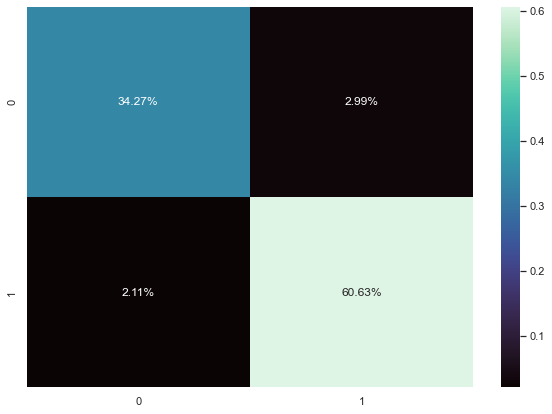

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(conmat/np.sum(conmat), annot=True, fmt='.2%',cmap="mako")

Okay now I will put it into a more like MATLAB shape of confusion matrix. In other words, I will show both the numbers and percantages.

<AxesSubplot:>

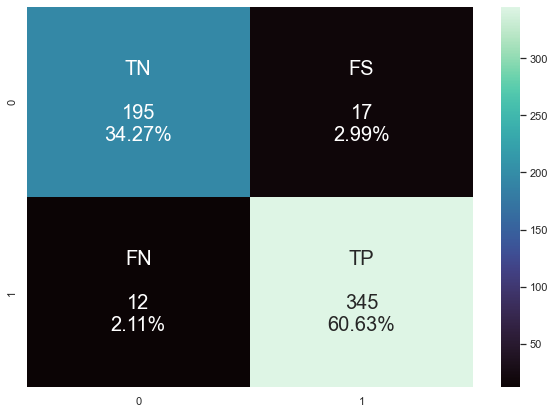

In [29]:
plt.figure(figsize=(10, 7))
group_names =['TN','FS','FN','TP']

group_counts = ['{0:0.0f}'.format(value) for value in conmat.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conmat.flatten()/np.sum(conmat)]

labels = [f'{v1}\n\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conmat, annot=labels, fmt='', cmap='mako',annot_kws={"fontsize":20})

We can also use `plot_confusion_matrix()` function on our trained model to plot a confusion matrix for documentation [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

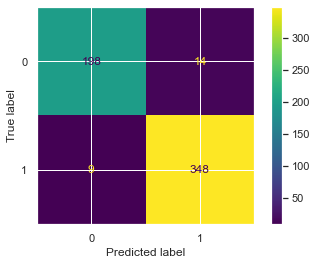

In [30]:
plot_confusion_matrix(log_reg, predictors, y)

Now It's time to visit some metrics. So far I only talked about Accuracy, let's define it first.

$$ Accuracy = \frac{number\:of\:correcly\:classified\:observation}{number\:of\:observation}$$

We have two other very important metrics that we can calculate by using the values from our confusion matrix.

1. The first one is Recall a.k.a True Positive Rate(TPR) or Sensitivity. To understand recall, let's visit the metrics above again, as we know (If you don't please check the link above) TP is the number of true cases (in this case people with breast cancer) we actually labeled as true and FN is the number of true cases but we labeled (wrongly) false. Hence, we can say that TP+FN represents the total number of true labels in our dataset. The metric Recall tells us among all the true cases how many of them we actually predicted true. The formula for Recall:
$$ Recall = \frac{TP}{TP+FN}$$

2.  The second one is Precision a.k.a Positive Predictive Value (PPV). To understand Precision we need to revisit one metric in addition to those in recall, False Positives. False positives are the instances we predicted true whereas they are actually part of false class. Precision tells us among all cases predicted as positive how many of them are actually positive.
$$Precision = \frac{TP}{TP+FP}\:\:\:\: $$

It's important to emphasize the difference one more time I think. Recall tells us that by using the predictors how many of the instances are labeled as positive by our model among all the instances in our dataset with a true label. On the other hand, Precision tells us among all the instances that are labeled as positive by our model using predictors how many of them are labeled as positive in our dataset.

I strongly recommend checking these links: [Precision, Recall, Sensitivity and Specificity](https://iq.opengenus.org/precision-recall-sensitivity-specificity/),   [Classification: Precision and Recal](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall) [Precision and Recall Machine Learning Mastery](https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/) 

In classification we generally use the two metrics I talked about above but there are some other metrics that we can encounter in some cases, for instance, we will use another metric called specificity in ROC Curve. Let's also have a look at some other metrics that we may use. 

3. Specificity a.k.a True Negative Rate (TNR) represents the proportion of instances belonging to the false class that were correctly clasified as belonging to the false class. 
$$Specificity = \frac{TN}{TN+FP}\:\:\:\: $$
4. Fallout a.k.a False Positive Rate (FPR) represents the proportion of instances belonging to the false class that were incorrectly classified  as belonging to the true class. 
$$Fallout = \frac{FP}{TN+FP}\:\:\:\: $$
5. Miss a.k.a False Negative Rate (FNR) represents the proportion of instances belonging to the true class that were incorrectly predicted as belonging to the true class. 
$$Miss = \frac{FN}{TP+FN}\:\:\:\: $$

We have one more important metric to talk about which is F1 Score but I will talk about it later in this notebook.

## ROC Curve and Precision-Recall Curve

Now I want to talk about two important plots that we will build by using these two metrics.

1. ROC Curve: Receiver Operating Characteristic (ROC) Curve is a very common plot that we use with binary classifiers. In some ways we can also make use of it with multiclass classification. I recommend everybody visiting the Wikipedia page because this Curve is around for a long time, actually has been used for more than 50 years [Wikipedia page](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). On the other hand, in terms of machine learning, the curve basically provides us Recall-vs-Fallout. When we plot the ROC Curve, the Area Under the Curve (AUC) is always less or equal than zero, by using this AUC we can decide whether or not our model performs well on the dataset. 
2. Precision/Recall Curve: Other than ROC Curve we have Precision/Recall Curve which plots Precision-vs-Recall. 

I recommend everybody to read the Machine Learning Mastery article which is about these metrics and curves [link](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

Let's plot these curves and then I will talk about some other details. 

We will use `roc_curve()` to get True Positive Rate(Recall) and False Positive Rate(Fallout). I will also use `roc_auc_score()` function to calculate area under the curve. You can learn more about these function on their documentation [roc_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) [roc_auc_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We also need to plot the scores that are calculated from the two functions below. For the plotting part I recommend you reading the Machine Learning Mastery article that I shared above (I actually used almost the same code, thank you Jason Brownlee).

Text(0.3, 0.65, 'AUC=0.943')

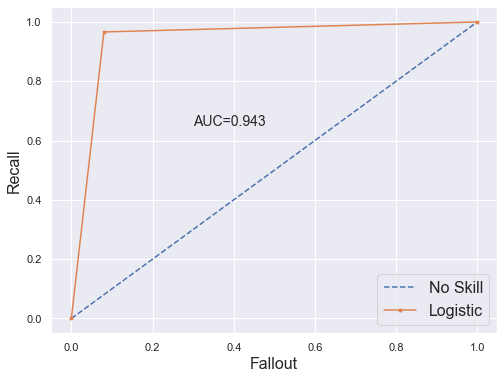

In [31]:
random_classifier = [0 for _ in range(len(y_train_pred))]
plt.figure(figsize=(8, 6))
rc_fpr, rc_tpr, rc_th = roc_curve(y, random_classifier)
fpr, tpr, th = roc_curve(y, y_train_pred)

sns.set_theme()

pyplot.plot(rc_fpr, rc_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')

pyplot.xlabel('Fallout',size=16)
pyplot.ylabel('Recall',size=16)

plt.legend(loc="lower right",prop={'size': 16})
ax= plt.gca()


ax.text(0.3 * (0.25 + 0.25+ 0.5), 0.65 * (0.25 + 0.25+ 0.5), 'AUC=%.3f' % roc_auc_score(y, y_train_pred),size=14)

I also need to talk about this no skill classifier. When AUC equals to 0.5, that means our model classifies the instances randomly which is equivalent to a no skill classifier.

Before using precision-recall curve, I want to talk about an important concept called Precision/Recall Trade-Off. As a reminder, Recall is the measure of positive instances in our dataset that are classified as positive and Precision tells us among all cases predicted as positive how many of them are actually positive. We always want to maximize precision and recall because we want our model to classify positive instances as positive and we want the instances classified as positive to be positive in the dataset as well.


 In practice, we can get relatively high precision and recall values but when we want to make one of these metrics even higher there is a trade-off. This trade-off even becomes more severe in real-life examples and we may have to select one of these metrics in some cases. To see why we need to choose one over the other let's consider a case in which we are trying to predict whether or not a person has breast cancer (as I did above) it would be really bad if we tell a patient has cancer whereas they actually don't have it, but probably there is a worse case which is telling a patient doesn't have cancer whereas actually he/she has cancer. In a situation like that, we would choose recall over precision because we are more interested in reducing False Negatives.

 An important thing to keep in mind is that even if we are looking for high recall, in this case, this doesn't mean precision is not important. What we are trying to do is favouring recall over precision and get a higher recall score in exchange for reducing precision but if we destroy precision while improving recall this is not a good trade-off. Therefore, we are basically trying to strike a balance in these trade-offs so that our model does a better job for the task we are interested in. I recommend everybody to read the medium documents that I share here in order. [link1](https://towardsdatascience.com/precision-and-recall-made-simple-afb5e098970f) [link2](https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134)

In general cases in which we are trying to get both recall and precision as higher as possible we can use another metric that combines Recall and Precision. This metric is called F1-Score and defined as:


$$F_1=2\cdot \frac{precision\cdot recall}{precision+recall}$$

F1 Score is actually harmonic mean of precision and recall. The reason harmonic mean is used instead of aritmetic mean is that harmonic mean is more convenient to deal with class imbalance. In arithmetic mean we treat all the values equally important but harmonic mean penalizes extreme values or class imbalance so that we can get a more accurate score for understanding how our model performs. This is very handy when there is a class imbalance because using metrics like Accuracy would make problems when there is a class imbalance, on the other hand, there are some times that we would not like to maximize both precision and recall, instead select one over another, in these cases we can directly use precision or recall for the task we have.  I share two very well-written medium post that you can find out more about F1-Score [link](https://towardsdatascience.com/the-f1-score-bec2bbc38aa6) [link2](https://towardsdatascience.com/essential-things-you-need-to-know-about-f1-score-dbd973bf1a3#:~:text=F1%2Dscore%20is%20one%20of,competing%20metrics%20%E2%80%94%20precision%20and%20recall.)


Okay now it's time to plot Precision/Recall Curve. To get precision and recall scores we will use `precision_recall_curve()` function (I recommend reading the documentation [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)). In addition, we can also use Area Under the Curve for Precision Recall Curve. 


* *A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate  (Taken from precision-recall documentation of scikit learn [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.))*


Let's finally draw our precision recall curve. 

Text(0.35, 0.8, 'F1-Score =0.960')

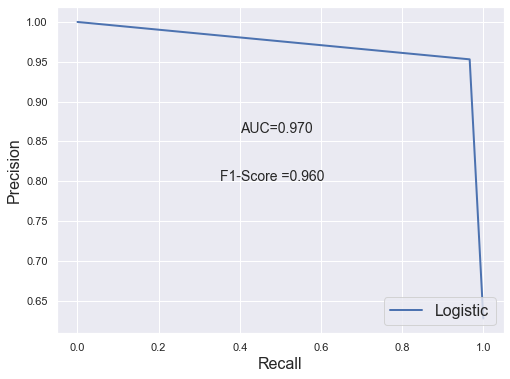

In [32]:
plt.figure(figsize=(8, 6))
precisions, recalls, ths = precision_recall_curve(y, y_train_pred)


plt.plot(recalls, precisions, "b-", linewidth=2, label='Logistic')

pyplot.xlabel('Recall',size=16)
pyplot.ylabel('Precision',size=16)

plt.legend(loc="lower right",prop={'size': 16})
ax= plt.gca()


ax.text(0.4 * (0.25 + 0.25+ 0.5), 0.86 * (0.25 + 0.25+ 0.5), 'AUC=%.3f' % auc(recalls, precisions),size=14)
ax.text(0.35 * (0.25 + 0.25+ 0.5), 0.80 * (0.25 + 0.25+ 0.5), 'F1-Score =%.3f' % f1_score(y, y_train_pred),size=14)

You can find documentation of F1-Score [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Let's try to get a higher Recall for our classifier. We will do this by slighly changing our decision function. Before changing our decision function, let's find out how it works. There is a function called `predict_proba()` which estimates probabilities being in negative or positive class for instances. 

In [33]:
X.T

,mean perimeter,mean texture
0,122.80,10.38
1,132.90,17.77
2,130.00,21.25
3,77.58,20.38
4,135.10,14.34
...,...,...
564,142.00,22.39
565,131.20,28.25
566,108.30,28.08
567,140.10,29.33


In [34]:
log_reg.predict_proba(predictors)

array([[1.00000000e+00, 2.39111301e-15],
       [9.99999981e-01, 1.90966829e-08],
       [9.99999964e-01, 3.61774169e-08],
       ...,
       [9.98234646e-01, 1.76535427e-03],
       [1.00000000e+00, 6.05778380e-11],
       [3.25707607e-02, 9.67429239e-01]])

The first row is the probability of being in the negative class and the second is the probability of being in the positive class. Here I will use the second row for predicting output.

In [35]:
y_propred=(log_reg.predict_proba(predictors)[:,1] >= 0.5) # if the probability exceeds the threshold 0.5 assign it to positive class.

Let's look at whether or not our predict function works as the same as logistic regression.

In [36]:
accuracy_score(log_reg.predict(predictors),y_propred)

1.0

They are the same. I will not use the predict function model that I implemented above, instead I will use `decision_function()` of our logistic regression model. The reason I showed the above example was I found this decision function confusing when I first learnt about it because its threshold is zero, whereas logistic regression uses the threshold value 0.5. 

I will pass the predictors to the `decision_function()` then this function will return either a negative or a positive result for all instances in our dataset. If the outcome is negative (in other words < zero) we can assign it to negative class or positive if outcome is equal to or bigger than zero. So this function works a bit differently, don't get confused. You can find more about this function in the documentation of Logistic Regresssion.

In [37]:
y_scores = log_reg.decision_function(predictors)
y_some_digit_pred = (y_scores >= 0)

In [38]:
accuracy_score(y_some_digit_pred,log_reg.predict(predictors))

1.0

We again have 1 accuracy so our function works since both of the results are equal. Okay now let's calculate our recall score. Here I will use `linspace()` function and get 25 points between -3 and 3 (you can set your own threshold space).

In [39]:
thresholds=np.linspace(-3, 3, num=25)
thresholds

array([-3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  ,
       -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,
        1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ])

In [40]:
from sklearn.metrics import recall_score
recall_score(y,y_some_digit_pred)

0.9747899159663865

Our recall score is 0.97. Let's find our if using one of these threshold will increase it. I will write a basic for loop that goes through each threshold, then if recall is bigger than 0.98 it will save this threshold.

In [41]:
threshold_98_recall=0
for i in thresholds:
    y_some_digit_pred = (y_scores >= i)
    if(recall_score(y,y_some_digit_pred)>=0.98):
        threshold_98_recall=i

In [42]:
threshold_98_recall

-0.5

When threshold is -1 we get a recall score over 0.98. Let's calculate the score we get when we change the threshold.

In [43]:
y_some_digit_pred = (y_scores >= threshold_98_recall)
recall_score(y,y_some_digit_pred)

0.9803921568627451

We reached our target recall value but it's also important to get a high precision too. While improving recall we shouldn't lower precision too much. Let's also look at precision.

In [44]:
precision_score(y,y_some_digit_pred)

0.948509485094851

Almost 0.95, seems like we improved recall without too much affecting precision that's good.

## Plotting Precision vs Recall Trade-off

Now I will focus more on visualizing this finding the right threshold process. Firstly I will use almost the same code that I used above, the difference is that I will add all the recall/precision and thresholds into a list, instead of selecting the one that gives maximum recall.

In [45]:
precisions1=[]
recalls1=[]
thresholds1=[]

for i in thresholds:
    y_some_digit_pred = (y_scores >= i)
    thresholds1.append(i)
    recalls1.append(recall_score(y,y_some_digit_pred))
    precisions1.append(precision_score(y,y_some_digit_pred)) 

Now It's time for visualizing part. I will create a function that has mainly three parts.
1. In the first part I will set figure size and convert our lists to arrays. I need to convert them because doing comparison in lists is a bit problamatic which is something that I did in the third part.
2. In the second part I will plot recall and precision to show how these metrics affected by different thresholds.
3. The third part is a bit complex so I will go code by code. In the first code I am getting the precision value that gives us recall over 0.98. I use `np.argmax()` here to get index of that recall value. Similarly, in the second code I am getting the threshold value that gives me recall over 0.98. The next two codes are for putting these black circles on precision and recall values that we are interested in and other codes are for putting dots between them.

In [46]:
def plot_precisionandrecallvsth(recalls,precisions,thresholds):
    #part1
    plt.figure(figsize=(10, 6))  
    thresholds=np.array(thresholds)
    recalls=np.array(recalls)
    precisions=np.array(precisions)
    #part2
    plt.plot(thresholds, recalls, "b-", label="Recall",linewidth=2)
    plt.plot(thresholds, precisions, "r--", label="Precision",linewidth=2)
    plt.xlabel("Threshold", fontsize=14) 
    plt.ylabel("Precision and Recall", fontsize=14)
    plt.axis([-3, 3, 0.7, 1.05])
    plt.legend(loc="center right", fontsize=16) 
    #part3
    recall_99_precision = precisions[np.argmax(recalls < 0.99)]
    threshold_99_recall = thresholds[np.argmax(recalls < 0.99)]
    plt.plot([threshold_99_recall], recalls[np.argmax(recalls < 0.99)], "ko")
    plt.plot([threshold_99_recall], [recall_99_precision], "ko")  
    plt.plot([threshold_99_recall, threshold_99_recall], [0.,recalls[np.argmax(recalls < 0.99)]], "k:")
    plt.plot([-3, threshold_99_recall], [recalls[np.argmax(recalls < 0.99)], recalls[np.argmax(recalls < 0.99)]], "k:")
    plt.plot([-3, threshold_99_recall], [recall_99_precision, recall_99_precision], "k:")
    plt.show()

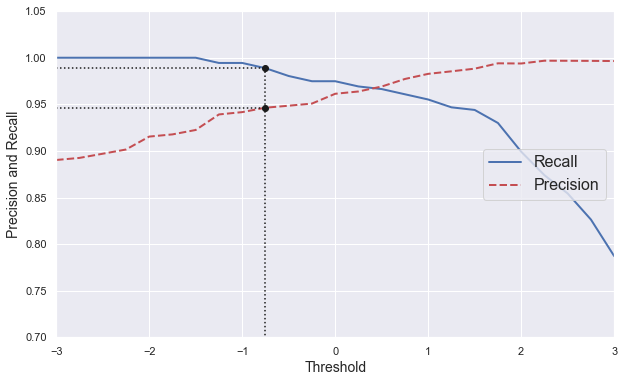

In [47]:
plot_precisionandrecallvsth(recalls1,precisions1,thresholds1)

Up to here, I used all the metrics on our training data. Normally, we should have used a test set for that because we are interested in the performance of our model on unseen data. Let's do a quick cross-validated example for finding out our model's performance on the test set. Here I will modify plot_precisionandrecallvsth() function to make it suitable for our cross-validated example. There will not be many differences, I will just change boundaries.

In [48]:
def plot_precisionandrecallvsth2(recalls,precisions,thresholds):
    #part1
    plt.figure(figsize=(10, 6))  
    #part2
    plt.plot(thresholds, recalls[:-1], "b-", label="Recall",linewidth=2)
    plt.plot(thresholds, precisions[:-1], "r--", label="Precision",linewidth=2)
    plt.xlabel("Threshold", fontsize=14) 
    plt.ylabel("Precision and Recall", fontsize=14)
    plt.axis([min(thresholds)-0.5, max(thresholds), 0.3, 1.05])
    plt.legend(loc="center right", fontsize=16) 
    #part3
    recall_99_precision = precisions[np.argmax(recalls < 0.99)]
    threshold_99_recall = thresholds[np.argmax(recalls < 0.99)]
    plt.plot([threshold_99_recall], recalls[np.argmax(recalls < 0.99)], "ko")
    plt.plot([threshold_99_recall], [recall_99_precision], "ko")  
    plt.plot([threshold_99_recall, threshold_99_recall], [0.,recalls[np.argmax(recalls < 0.99)]], "k:")
    plt.plot([min(thresholds)-5, threshold_99_recall], [recalls[np.argmax(recalls < 0.99)], recalls[np.argmax(recalls < 0.99)]], "k:")
    plt.plot([min(thresholds)-5, threshold_99_recall], [recall_99_precision, recall_99_precision], "k:")
    plt.show()

In [49]:
y_crossvalidated = cross_val_predict(log_reg, X.T, y, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y, y_crossvalidated)

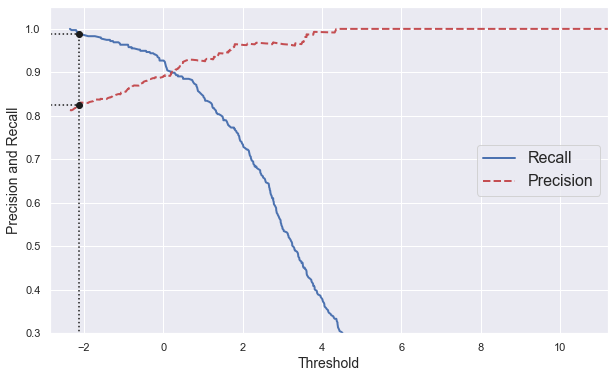

In [50]:
plot_precisionandrecallvsth2(recalls,precisions,thresholds)

This looks like our first precision and recall vs threshold plot but since we have more threshold values here we can see more clearly how precision and recall changed if we change threshold.

Moreover, I would like to emphasize a point. Normally, when I deal with improving precision or recall I simple plot precision-vs-recall curve and select the precision value that corresponds to recall that I'm interested in, or do inverse of that and get precision that I'm interested in. The way to plot previsionandrecall-vs-threshold is actually something I learnt from a book named Hands-On Machine Learning with Scikit-Learn and TensorFlow (awesome book, I recommend to everybody). I think the above way is more explanatory for finding precision and recall but we can also use precision-vs-recall curve as below.

Text(0.3675, 0.6000000000000001, 'F1-Score = 0.960')

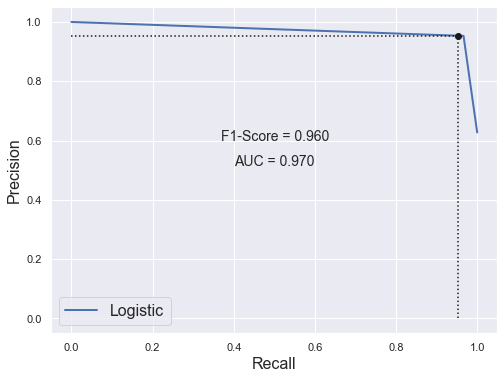

In [51]:
plt.figure(figsize=(8, 6))
precisions, recalls, thresholds = precision_recall_curve(y, y_train_pred)


plt.plot(recalls, precisions, "b-", linewidth=2, label='Logistic')

pyplot.xlabel('Recall',size=16)
pyplot.ylabel('Precision',size=16)
plt.legend(loc="lower left",prop={'size': 16})
ax= plt.gca()
plt.plot(precisions[np.argmax(recalls < 0.99)], precisions[np.argmax(recalls < 0.99)], "ko")
plt.plot([precisions[np.argmax(recalls < 0.99)], precisions[np.argmax(recalls < 0.99)]], [0.,precisions[np.argmax(recalls < 0.99)]], "k:")
plt.plot([min(thresholds), precisions[np.argmax(recalls < 0.99)]], [precisions[np.argmax(recalls < 0.99)], precisions[np.argmax(recalls < 0.99)]], "k:")
ax.text(0.4 * (0.25 + 0.25+ 0.5), 0.86 * (0.25 + 0.25+ 0.1), 'AUC = %.3f' % auc(recalls, precisions),size=14)
ax.text(0.35 * (0.25 + 0.25+ 0.55), 0.80 * (0.25 + 0.25+ 0.25), 'F1-Score = %.3f' % f1_score(y, y_train_pred),size=14)


Lastly, there is an important question we should consider: Which one should we use ROC Curve or Precision-vs-recall Curve ?
<br>**==>** You should prefer ROC Curve when there isn't a relatively big imbalance in your response features, whereas, and should prefer Precision-vs-Recall Curve in cases which you have class imbalance.